In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics


Bad key savefig.frameon in file C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file f

In [2]:
# Keep only certain columns
mpg = pd.read_csv('datasets/mpg/mpg.csv', usecols = ['mpg', 'weight', 'horsepower', 'origin', 'cylinders'])
mpg.head()

,mpg,cylinders,horsepower,weight,origin
0,18.0,8,130,3504,USA
1,15.0,8,165,3693,USA
2,18.0,8,150,3436,USA
3,16.0,8,150,3433,USA
4,17.0,8,140,3449,USA


In [3]:
# Descriptive statistics
mpg.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


In [4]:
pd.crosstab(index=mpg['origin'], columns='count')

col_0,count
origin,
Asia,79
Europe,68
USA,245


In [5]:
pd.crosstab(index=mpg['origin'], columns=mpg['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
Asia,4,69,0,6,0
Europe,0,61,3,4,0
USA,0,69,0,73,103


In [6]:
# Descriptive statistics by group
mpg.groupby('origin').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
Asia,79.0,30.450633,6.090048,18.0,25.70,31.6,34.050,46.6
Europe,68.0,27.602941,6.580182,16.2,23.75,26.0,30.125,44.3
USA,245.0,20.033469,6.440384,9.0,15.00,18.5,24.000,39.0


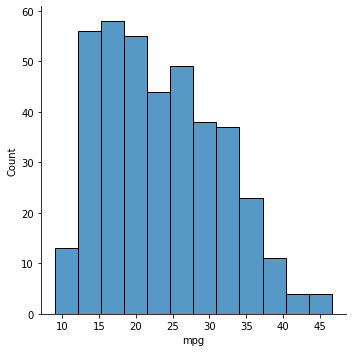

In [7]:
# Histogram of mpg
sns.displot(data=mpg, x='mpg')

<AxesSubplot:xlabel='origin', ylabel='mpg'>

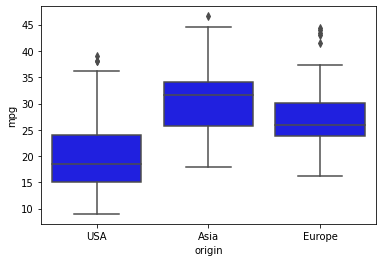

In [8]:
# Box plot of mpg by origin
sns.boxplot(x='origin', y='mpg', data=mpg, color='blue')

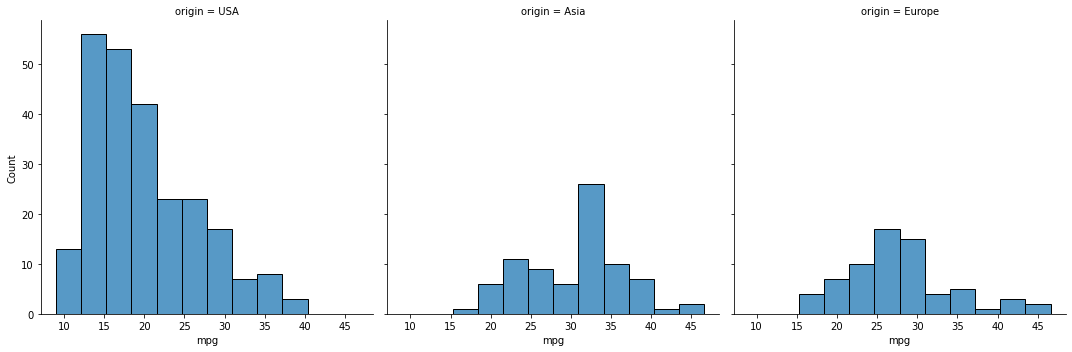

In [9]:
sns.displot(data=mpg, x="mpg", col="origin")

In [10]:
usa_cars = mpg[mpg['origin']=='USA']
europe_cars = mpg[mpg['origin']=='Europe']

In [11]:
stats.ttest_ind(usa_cars['mpg'], europe_cars['mpg'])

Ttest_indResult(statistic=-8.534455914399228, pvalue=6.306531719750568e-16)

In [12]:
mpg[['mpg','horsepower','weight']].corr()

,mpg,horsepower,weight
mpg,1.000000,-0.778427,-0.832244
horsepower,-0.778427,1.000000,0.864538
weight,-0.832244,0.864538,1.000000


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between weight and mileage')

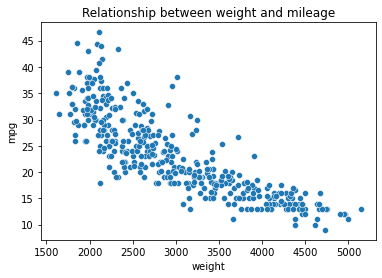

In [13]:
# Scatter plot of weight and mpg, add a label
sns.scatterplot(mpg['weight'],mpg['mpg'])
plt.title("Relationship between weight and mileage")

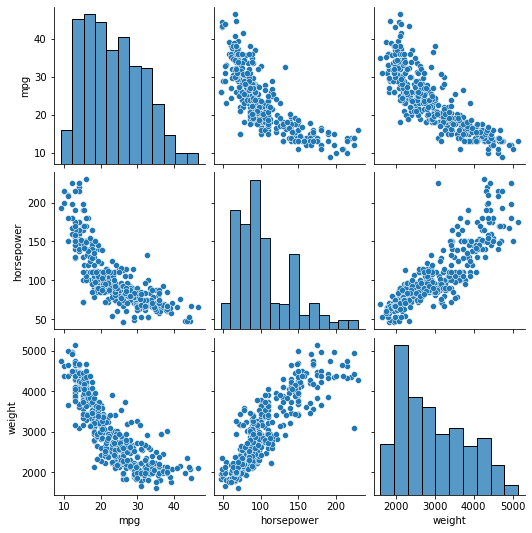

In [14]:
sns.pairplot(mpg[['mpg','horsepower','weight']])

In [15]:
# Linear regression of weight on mpg
stats.linregress(x=mpg['weight'], y=mpg['mpg'])

LinregressResult(slope=-0.007647342535779578, intercept=46.21652454901758, rvalue=-0.8322442148315754, pvalue=6.015296051435726e-102, stderr=0.0002579632782734318)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

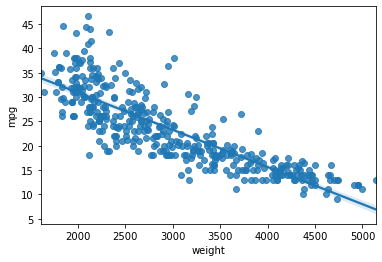

In [16]:
sns.regplot(x="weight", y="mpg", data=mpg)

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(mpg[['weight']], mpg[['mpg']], random_state=1234)

In [18]:
y_train.shape

(294, 1)

In [19]:
y_test.shape

(98, 1)

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Print first five observations 
y_pred[:5]

array([[14.86634263],
       [23.48793632],
       [26.2781699 ],
       [27.69989655],
       [29.05319785]])

In [21]:
# Get the training model coefficients
regr.coef_

array([[-0.00760282]])

In [22]:
metrics.r2_score(y_test, y_pred)

0.6811923996681357

In [23]:
metrics.mean_squared_error(y_test, y_pred)

21.63348076436662